## Introduction
This tutorial shows how to set up and run Mandel's consolidation problem based
on the Biot equations of poroelasticity.

Other [examples](https://github.com/pmgbergen/porepy/tree/develop/examples) can be run in a similar fashion.

## Mandel's problem

Unlike the general poromechanical model provided in PorePy that considers a compressible
fluid, Mandel's problem follows the Biot equations, which is based on the assumption
of slight fluid compressibility.

The mixer class for this verification is therefore based on the derived model class
`BiotPoromechanics` (see `porepy.models.derived_models.biot`), a subclass of
the full poromechanical model `Poromechanics` (see `porepy.models.poromechanics`).

Let us first import the mixer class `MandelSetup`:

In [5]:
import porepy as pp

from porepy.examples.mandel_biot import MandelSetup

Now, it is simply a matter of setting up the model parameters. In this example, we
will use real physical parameters. For the user's convenience, the `mandel_biot.py`
module contains suggested physical constants for the fluid and the solid (the same
physical parameters employed in [3]).

Let's import them:

In [6]:
from porepy.examples.mandel_biot import mandel_fluid_constants, mandel_solid_constants

and set the model parameters:

In [7]:
# Set material constants
material_constants = {
    "solid": pp.SolidConstants(mandel_solid_constants),
    "fluid": pp.FluidConstants(mandel_fluid_constants),
}

# Set scaling
scaling = {"m": 1e-3}
units = pp.Units(**scaling)

# Create time manager
time_manager = pp.TimeManager(
    schedule=[0, 2e1, 1e2, 1e3, 5e3, 1e4],  # [s]
    dt_init=20,  # [s]
    constant_dt=True,  # [s]
)

# Set mesh size (only mesh_size_bound is used).
ls = 1 / units.m  # length scaling
mesh_arguments = {"cell_size": 50.0 * ls}

# Create model params
params = {
    "material_constants": material_constants,
    "meshing_arguments": mesh_arguments,
    "time_manager": time_manager,
    "plot_results": True,
    "units": units,
}

Note that we introduced a length scaling via the `pp.Units` class, where we specify a
factor of `1e-3`, thus effectively measuring length in _millimeters_. Defining a
properly scaled problem can have positive consequences for the conditioning of the
linear system. Note that other base magnitudes can also be scaled analogously.

Finally, let's run the verification setup:

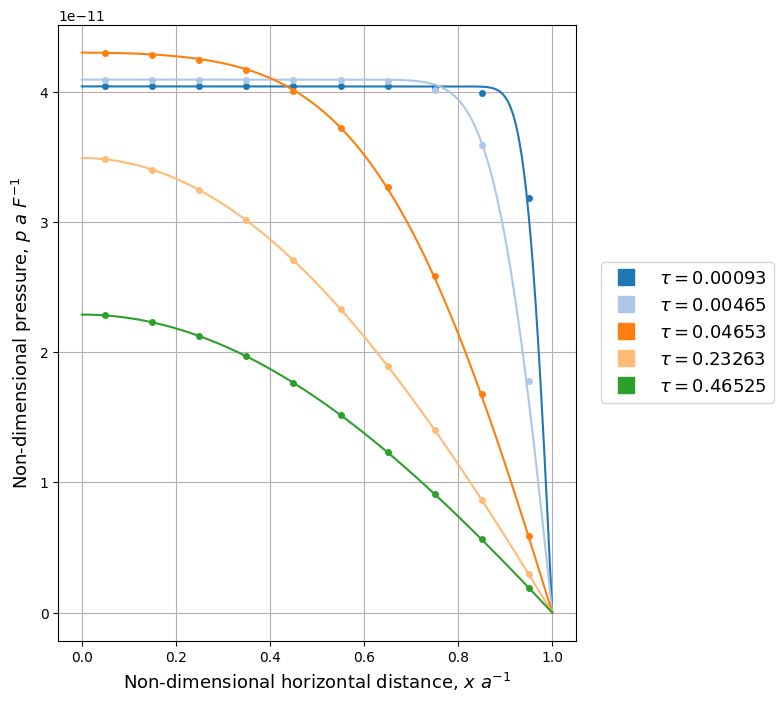

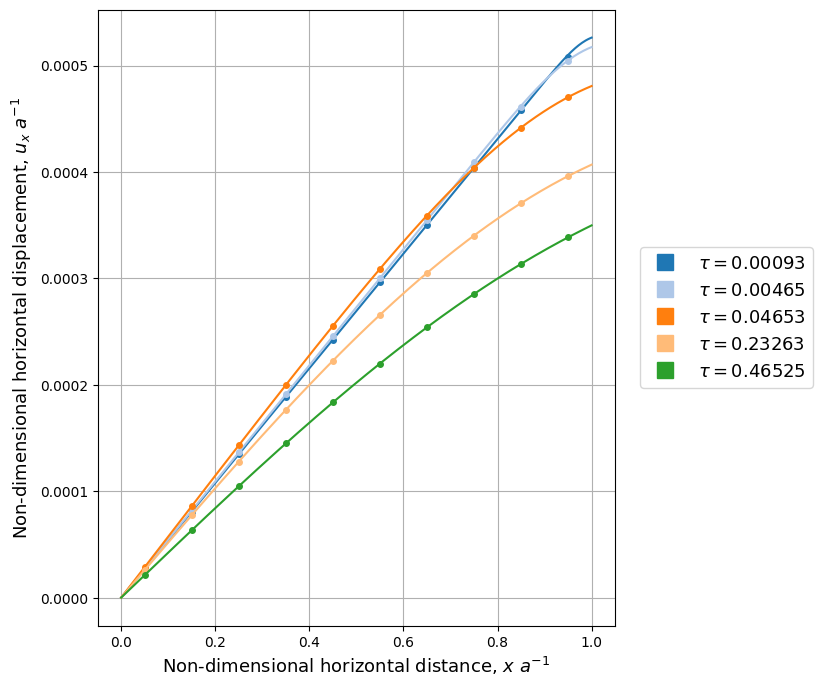

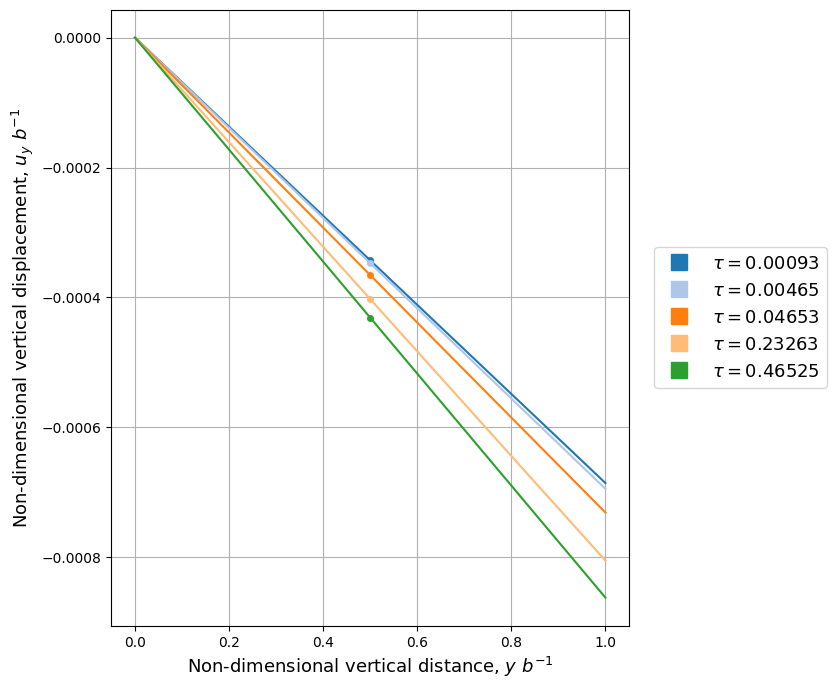

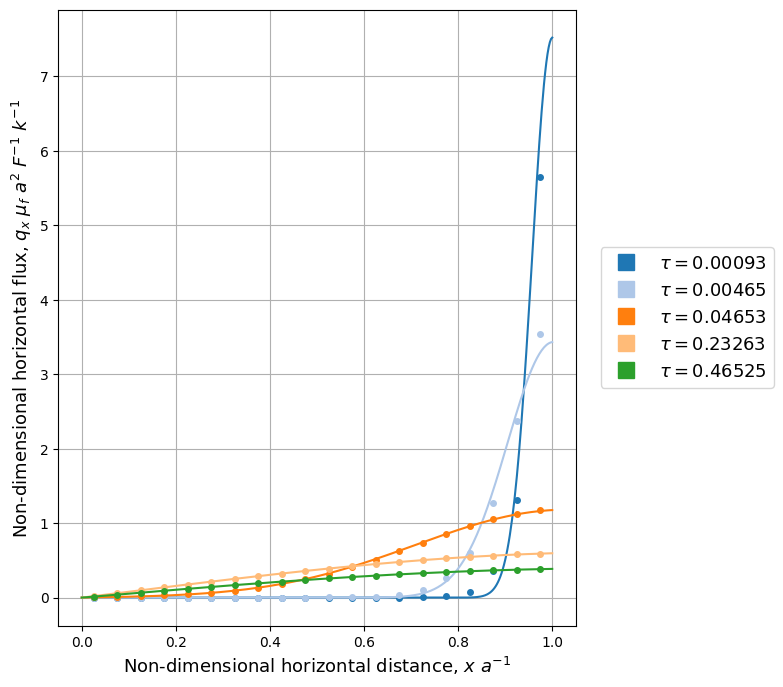

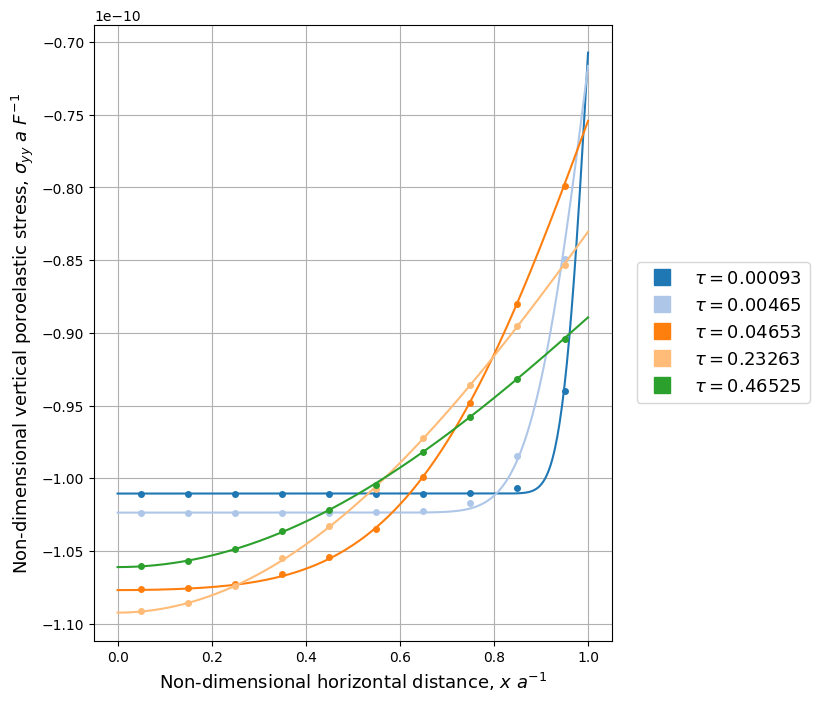

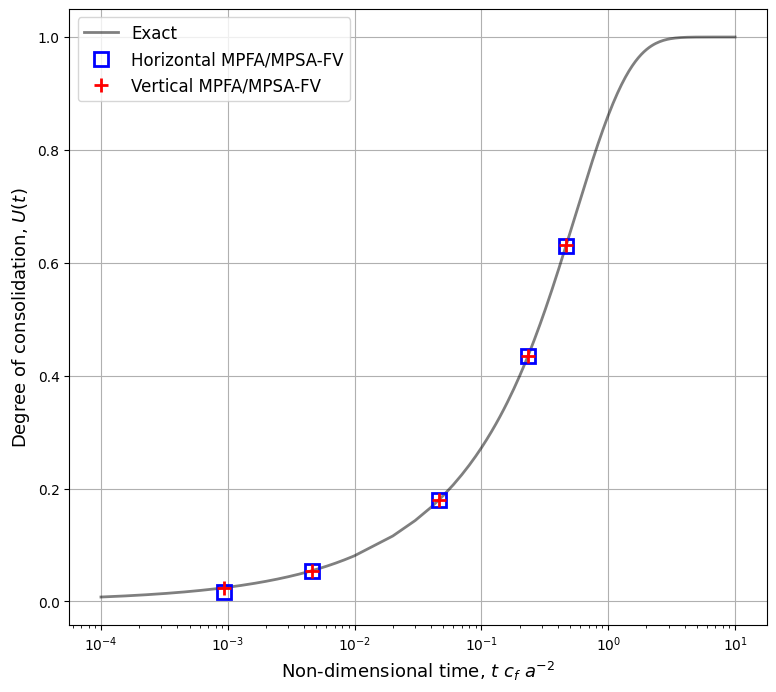

In [8]:
setup = MandelSetup(params=params)
pp.run_time_dependent_model(model=setup, params=params)

In the plots from above, the solid lines represent the exact solutions and the dots
the numerical approximations obtained with MPSA/MPFA-FV. Each line corresponds to a
scheduled time, with $\tau$ denoting the dimensionless time.

The last plot shows the degree of consolidation (a dimensionless quantity measuring
the state of consolidation of the soil) as a function of time.

## References

[1] Varela, J., Gasda, S. E., Keilegavlen, E., & Nordbotten, J. M. (2021). A
Finite-Volume-Based Module for Unsaturated Poroelasticity. Advanced Modeling with the
MATLAB Reservoir Simulation Toolbox.

[2] Nordbotten, J. M. (2016). Stable cell-centered finite volume discretization for Biot
equations. SIAM Journal on Numerical Analysis, 54(2), 942-968.

[3] Keilegavlen, E., Berge, R., Fumagalli, A., Starnoni, M., Stefansson, I., Varela, J.,
& Berre, I. (2021). Porepy: An open-source software for simulation of multiphysics
processes in fractured porous media. Computational Geosciences, 25, 243-265.

## What we have explored

We have shown how to set up and run an instance of ``MandelSetup`` to simulate Mandel's consolidation problem of poroelasticity.